In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost import mebocost


## MEBOCOST for predicting metabolite-based cell-cell communications
<p> In this tutorial, we apply MEBOCOST on a demo dataset which 200 cells were sampled from a HNSC scRNA-seq data (GSE103322).
    
Note: since this demo was analyzed by simulated data, the predicted result of communication might looks not biologically meaningful. The goal of this notebook is to show the step-by-step analysis</p>

## 1. Create mebocost object
<p> Users can pass data either by adata scanpy object (1.1 reccomended), or by python pandas data frame (1.2)</p>

### 1.1 get expression and cell annotation data from scanpy object

In [2]:
adata = sc.read_h5ad('/data3/project/Eunkyu_3/data2_mebo_validation/ce14/data2_ce14.h5ad')
## check adata (cells, genes)
print(adata.shape)
### make sure your adata cover all genes and all cells
### if not, you may want to load all genes saved in raw by doing:
# adata = adata.raw.copy()


(2051, 15171)


##### create mebocost object

In [3]:
## initiate the mebocost object
### import expression data by scanpy adata object
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['Adipocyte_Type'],
                        met_est = 'mebocost',
                        config_path = '/data3/project/Eunkyu_3/MEBOCOST/mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='mouse',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


[May 12, 2025 12:46:01]: We get expression data with 15171 genes and 2051 cells.
[May 12, 2025 12:46:01]: Data Preparation Done in 0.0278 seconds


### 1.2 get expression and cell annotation from external files (skip if you have done 1.1)
<p>Users can provide exp_mat (scRNA-seq gene-by-cell expression matrix) and cell_ann (cell-by-annoatation matrix) from external files, such as .csv, .tsv, and .txt files, to MEBOCOST for mCCC analysis. Please refer to pandas read_csv functions to read those files (<a href=https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>read_csv</a>) into Python. In the case that users want to use expression data and meta data from Seurat in R. It is strongly recommended first writing out expression matrix and meta data (cell annotation) from Seurat in R. Once the expression and meta data were saved in your local, those files can be read into Python by pandas and then pass to mebocost as the instructions in following. Please make sure you have total genes in the table, rather than only highly variable genes.</p>


In [8]:
### pass expression data and cell annotation table by pandas data frame
### taking exp_mat and cell_all from the above 
### read expression data from a external file
exp_mat = pd.read_csv(your_exp_data_file)
cell_ann = pd.read_csv(your_cell_ann_data_file)

mebo_obj = mebocost.create_obj(
                        adata = None,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = '/data3/project/Eunkyu_3/MEBOCOST/mebocost.conf',
                        exp_mat=exp_mat,
                        cell_ann=cell_ann,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        cutoff_exp='auto',
                        cutoff_met='auto',
                        cutoff_prop=0.25,
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


#### 2.1 Aggregating metabolite enzyme expression [Optional]
<li> Note: this estimation have been already incoperated in mebo_obj.infer_commu, so only run this step separately if you just want to aggregate enzyme expression for metabolites and stop from doing further analysis.</li>

In [4]:
## 【optional】only aggregate metabolite enzyme expression for cells 
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()


[May 12, 2025 12:43:55]: Load config and read data based on given species [mouse].
[May 12, 2025 12:43:55]: Aggregate metabolite enzymes using mebocost


In [7]:
## check the aggregated enzyme expression for metabolites
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)
## print head
met_mat.head()


,AAAGAACCAGGAATCG_3,AACGGGATCTTTGCAT_3,AAGCATCTCCCGAGGT_3,AATTCCTAGAGTATAC_3,ACAACCAAGGTGCAGT_3,ACATCGATCAAATGCC_3,ACCCTTGCATAGTCGT_3,ACGATGTTCACCTACC_3,ACGGGTCAGATTCGCT_3,ACTATGGGTAAGACCG_3,...,TTCGGTCGTTAGTTCG_12,TTCGGTCGTTGTGGCC_12,TTCTTCCTCTCGACCT_12,TTGAACGCAGGAATCG_12,TTGAACGGTCGTTGGC_12,TTGTTGTAGGATTCCT_12,TTTATGCGTAGGTCAG_12,TTTCACATCGATAACC_12,TTTGGAGAGTTTGCTG_12,TTTGGAGGTTATCCAG_12
HMDB0003450,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
HMDB0003948,0.333333,0.777778,0.0,0.0,0.111111,0.222222,0.333333,0.0,0.111111,0.222222,...,1.333333,0.444444,0.666667,0.333333,0.777778,0.0,0.444444,0.222222,0.222222,0.666667
HMDB0003712,0.333333,0.750000,0.0,0.0,0.083333,0.166667,0.250000,0.0,0.083333,0.166667,...,1.083333,0.416667,0.500000,0.250000,0.666667,0.0,0.333333,0.250000,0.333333,0.500000
HMDB0003945,0.300000,0.700000,0.0,0.0,0.100000,0.200000,0.300000,0.0,0.100000,0.200000,...,1.200000,0.400000,0.600000,0.300000,0.700000,0.0,0.400000,0.200000,0.200000,0.600000
HMDB0003949,0.333333,0.777778,0.0,0.0,0.111111,0.222222,0.333333,0.0,0.111111,0.222222,...,1.333333,0.444444,0.666667,0.333333,0.777778,0.0,0.444444,0.222222,0.222222,0.666667


#### 2.2 communication inference

In [4]:
## metabolic communication inference, this step takes a while
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 1,
                                pval_method='permutation_test_fdr',
                                pval_cutoff=0.05
                            )


[May 12, 2025 12:46:12]: Load config and read data based on given species [mouse].
[May 12, 2025 12:46:13]: Aggregate metabolite enzymes using mebocost
[May 12, 2025 12:46:28]: Infer communications
[May 12, 2025 12:46:28]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[May 12, 2025 12:46:28]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[May 12, 2025 12:46:28]: met_sensor: (202, 8)
[May 12, 2025 12:46:28]: avg_exp: (1746, 2) for (gene, cell) of needed
[May 12, 2025 12:46:28]: avg_met: (544, 2) for (metabolite, cell) of needed
[May 12, 2025 12:46:28]: shuffling 1000 times for generating backgroud
[May 12, 2025 12:46:31]: take exp and met avg for shuffling
[May 12, 2025 12:46:37]: thread: 8
[May 12, 2025 12:46:38]: Slc7a1 ~ HMDB0000517
[May 12, 2025 12:46:38]: Normalizing Cluster Mean and Calculating Communication Score
[May 12, 2025 12:46:38]: Cd36 ~ HMDB0003276
[May 12, 2025 12:46:38]: Calculating P-value
[May 12, 2025 12:46:39]: Slc5a6 ~ HMDB00

In [10]:
print('Number of mCCC detected by enzyme and sensor co-expression: ', commu_res.shape[0])


Number of mCCC detected by enzyme and sensor co-expression:  4


#### 2.3 save mebocost object and reload object
#### MEBOCOST object can be saved as a pickle file which is a python-based file format using less disk space
##### save

In [5]:
# ### save 
mebocost.save_obj(obj = mebo_obj, path = '/data3/project/Eunkyu_3/data2_mebo_validation/ce14/ce14_commu.pk')


##### reload

In [2]:
## re-load the previous object if needed
mebo_obj = mebocost.load_obj('/data3/project/Eunkyu_3/data2_mebo_validation/ce14/ce14_commu.pk')


[May 14, 2025 22:55:29]: Data Preparation Done in 0.1884 seconds


In [3]:
## check cutoff
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_agg_enzyme cutoff: %s'%mebo_obj.cutoff_met)


sensor_exp cutoff: 1.0
metabolite_agg_enzyme cutoff: 0.25


#### 2.4 Integrate COMPASS to constrain mCCC analysis by efflux and influx rates
<p>This can be done by running COMPASS, a tool for compute flux rates, using single-cell data. Please install the COMPASS following the instructions at https://yoseflab.github.io/Compass/install.html</p>


In [5]:
### Running COMPASS for each cell type by the average gene expression
### output average gene expression
avg_exp = sc.get.aggregate(adata, by = 'celltype', func='mean')
avg_exp = pd.DataFrame(avg_exp.layers['mean'], index = avg_exp.obs_names, columns = avg_exp.var_names).T
# ## do un log since COMPASS will take log in the algorithm
avg_exp = avg_exp.apply(lambda col: np.exp(col)-1)
avg_exp.to_csv('avg_exp_mat.tsv', sep = '\t')


<p>Running the COMPASS using avg_exp_mat.tsv, and get secretion.tsv and uptake.tsv results</p>
<p>Example command line in bash:</p>

```shell
exptsv_path=your_folder/avg_exp_mat.tsv
species=homo_sapiens
output_path=your_folder/compass_res
temp_path=your_folder/compass_res_tmp
core=8
compass=/root/miniconda3/bin/compass

echo '++++ run compass'
## since it is cell type level analysis, so lambda set to 0
$compass --data $exptsv_path --num-thread $core --species $species --output-dir $output_path --temp-dir $temp_path --calc-metabolites --lambda 0
echo 'Finished'
```

#### Update the commu_res in the mebocost object based on secretion.tsv and uptake.tsv


In [3]:
## apply constraint on compass flux result
updated_res = mebo_obj._ConstainFlux_(compass_folder='data/demo/compass_res/',
                                    efflux_cut='auto',
                                    influx_cut='auto',
                                    inplace=False)



efflux_cut: 10.105265015312568
influx_cut: 2.352030916167703


In [4]:
## update to the object
mebo_obj.commu_res = updated_res
print('Number of mCCC detected by further flux contrains', updated_res.shape[0])


Number of mCCC detected by further flux contrains 196


#### [Optinal] 2.6 Examing whether the mCCC were confounded by highly abundant metabolites in the blood.

<p>We have tested the correlation between mCCC scores and blood metabolite concentrations across multiple samples. Generally, we did <b>NOT</b> observe a very strong confounding from blood metabolites to MEBOCOST mCCC scores. Nevertheless, we provide users with a function to examine such a confounding in their own data and offer correction by fitting a linear regression model between mCCC score and metabolite level in blood. The corrected mCCC score will be calculated by subtracting the predicted values from the original mCCC score in the regression model. To do this, simply run the following function. The met_cont_file is a required data, which should be a table with two columns corresponding to metabolite name and concentration, formatted as tab-delimited and without a header.</p>


In [5]:
corrected_commu_res = mebo_obj._blood_correct_test_(met_cont_file='data/mebocost_db/common/hmdb_blood_metabolite_concentration.tsv',
                                commu_score_col='Commu_Score',
                                title='',
                                show_plot=False,
                                pdf=False)
## the Corrected_Commu_Score column is the corrected mCCC score. Update the commu_score table to the object, if the confounding is strong.
mebo_obj.commu_res = corrected_commu_res.copy()


### 2.7 Now explore the mCCC result by Interactive Visualization Fuction
<p>To provide a user-friendly visualization of mebocost result, especially for those datasets with large number of communication events, notebook interactive view shed lights in. We developed the Jupyter interactive widgets to mimic webpage.
NOTE: this function can only be used in Jupyter notebook</p> 

In [6]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters
mebo_obj.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)


<b>Select and Click button to visulize</b>

### 2.8 You can also visualize mCCC result by generating figure manually

#### summary of the number of communication events

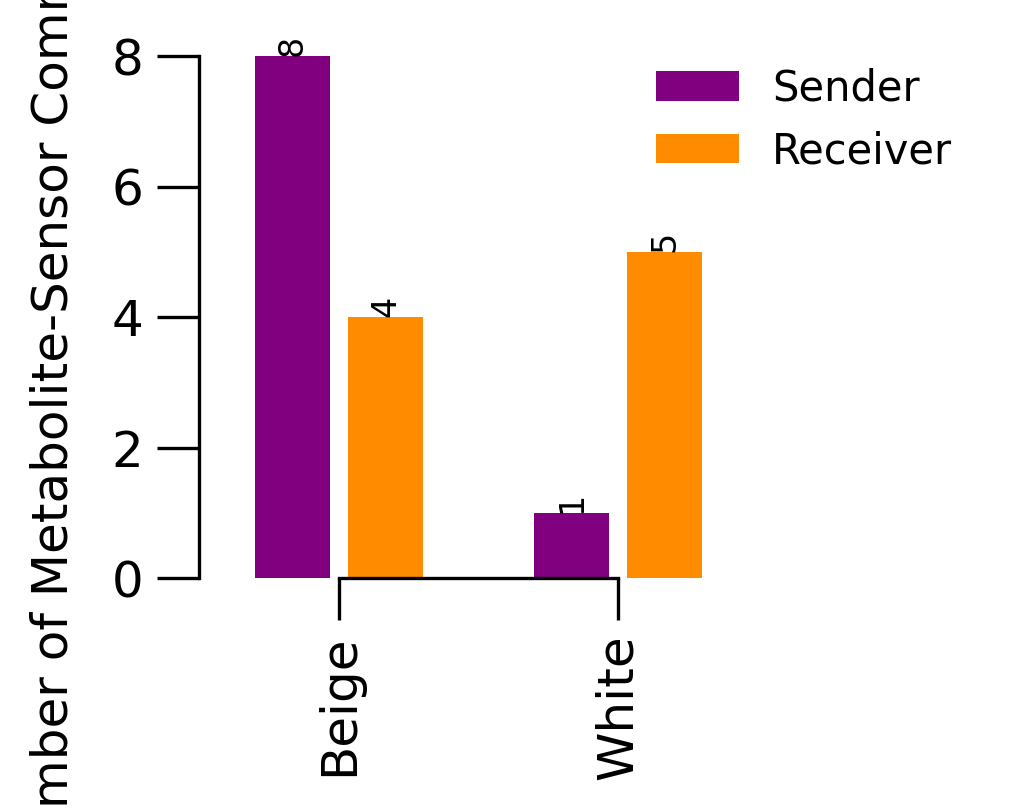

In [7]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    xorder=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )



#### summay of communication in cell-to-cell network

[May 12, 2025 12:47:34]: show communication in cells by network plot


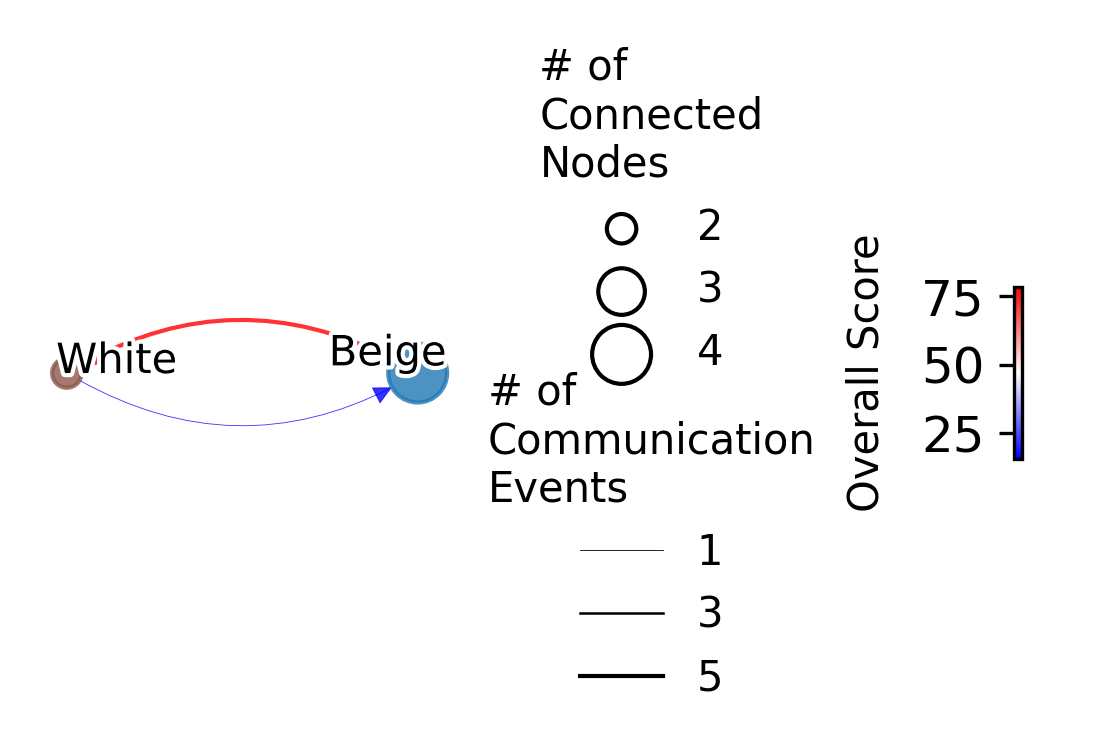

In [8]:
## circle plot to show communications between cell groups
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    linewidth_value_range = None,
                    node_size_norm=(50, 200),
                    node_value_range = None,
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=False
                )

### the "overall score" represent the sum of -log10(FDR) of detected metabolite-sensor communications between a pair of cell types



#### Showing the communication between sender and receiver in a dot plot

[May 12, 2025 12:47:41]: plot dot plot to show communication in cell type level


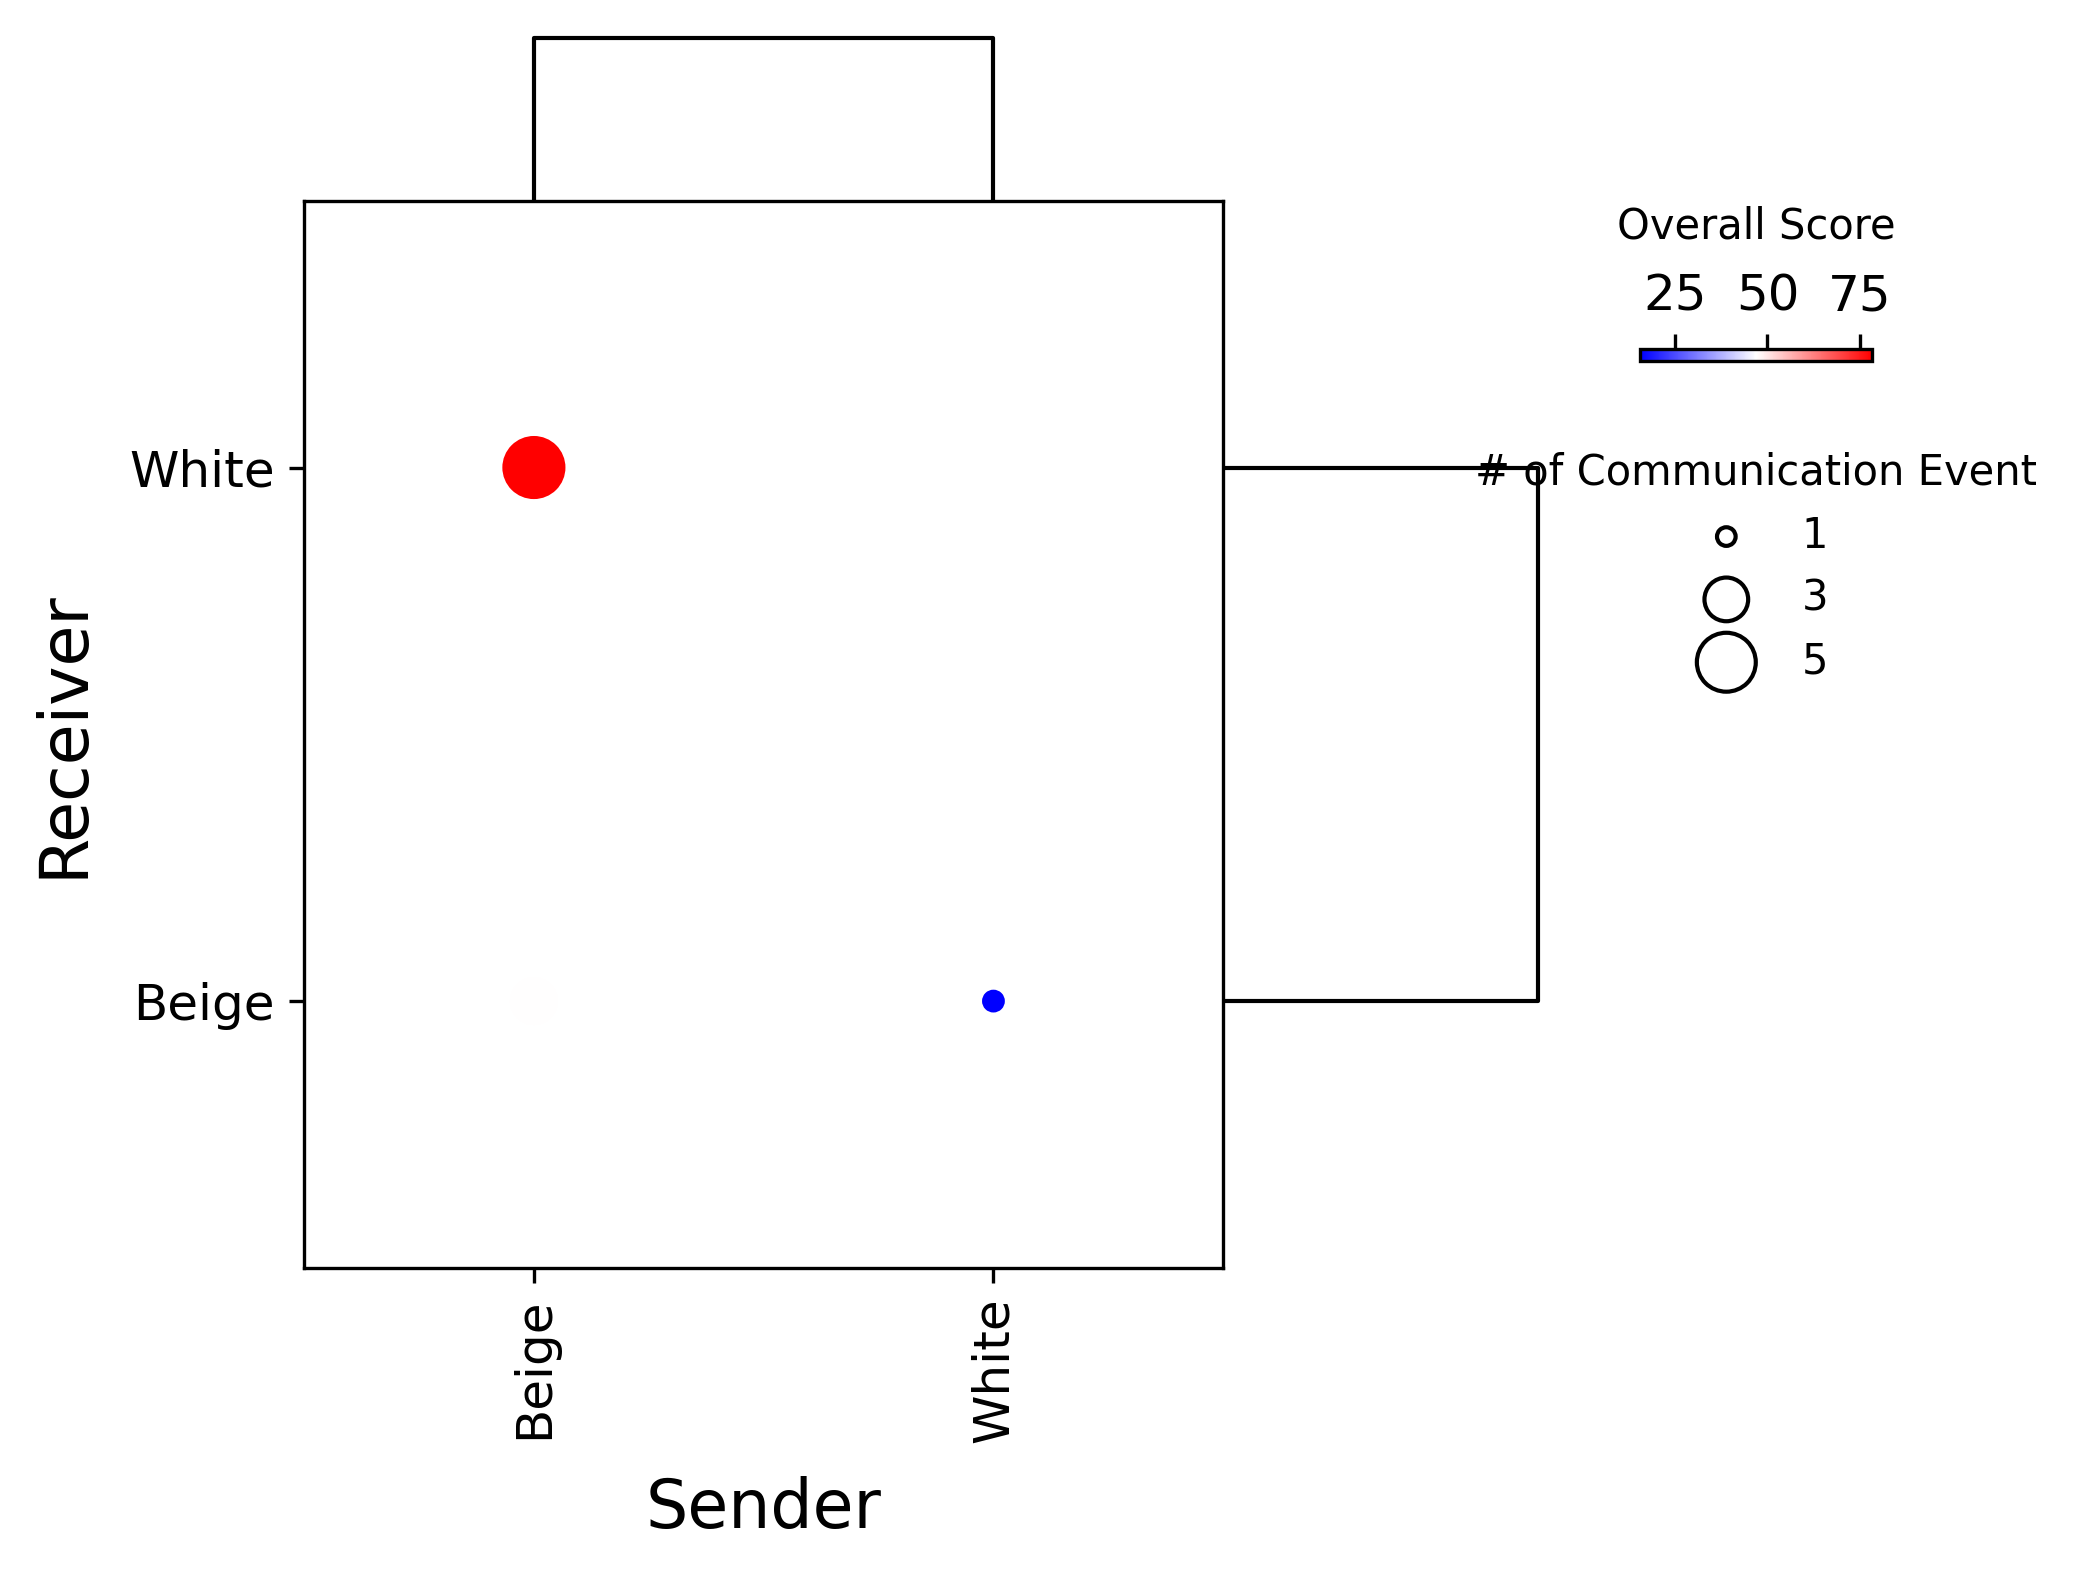

In [9]:
### dot plot to show the number of communications between cells

mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=None,
                        dot_size_norm =(20, 200),
                        dot_value_range = None,
                        dot_color_vmin=None,
                        dot_color_vmax=None,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0,
                        dendrogram_cluster=True,
                        sender_order=[],
                        receiver_order=[],
                        return_fig = False
                    )


#### Showing the detailed communications (sender-receiver vs metabolite-sensor) in a dot map

[May 12, 2025 12:47:55]: plot heatmap for significant result


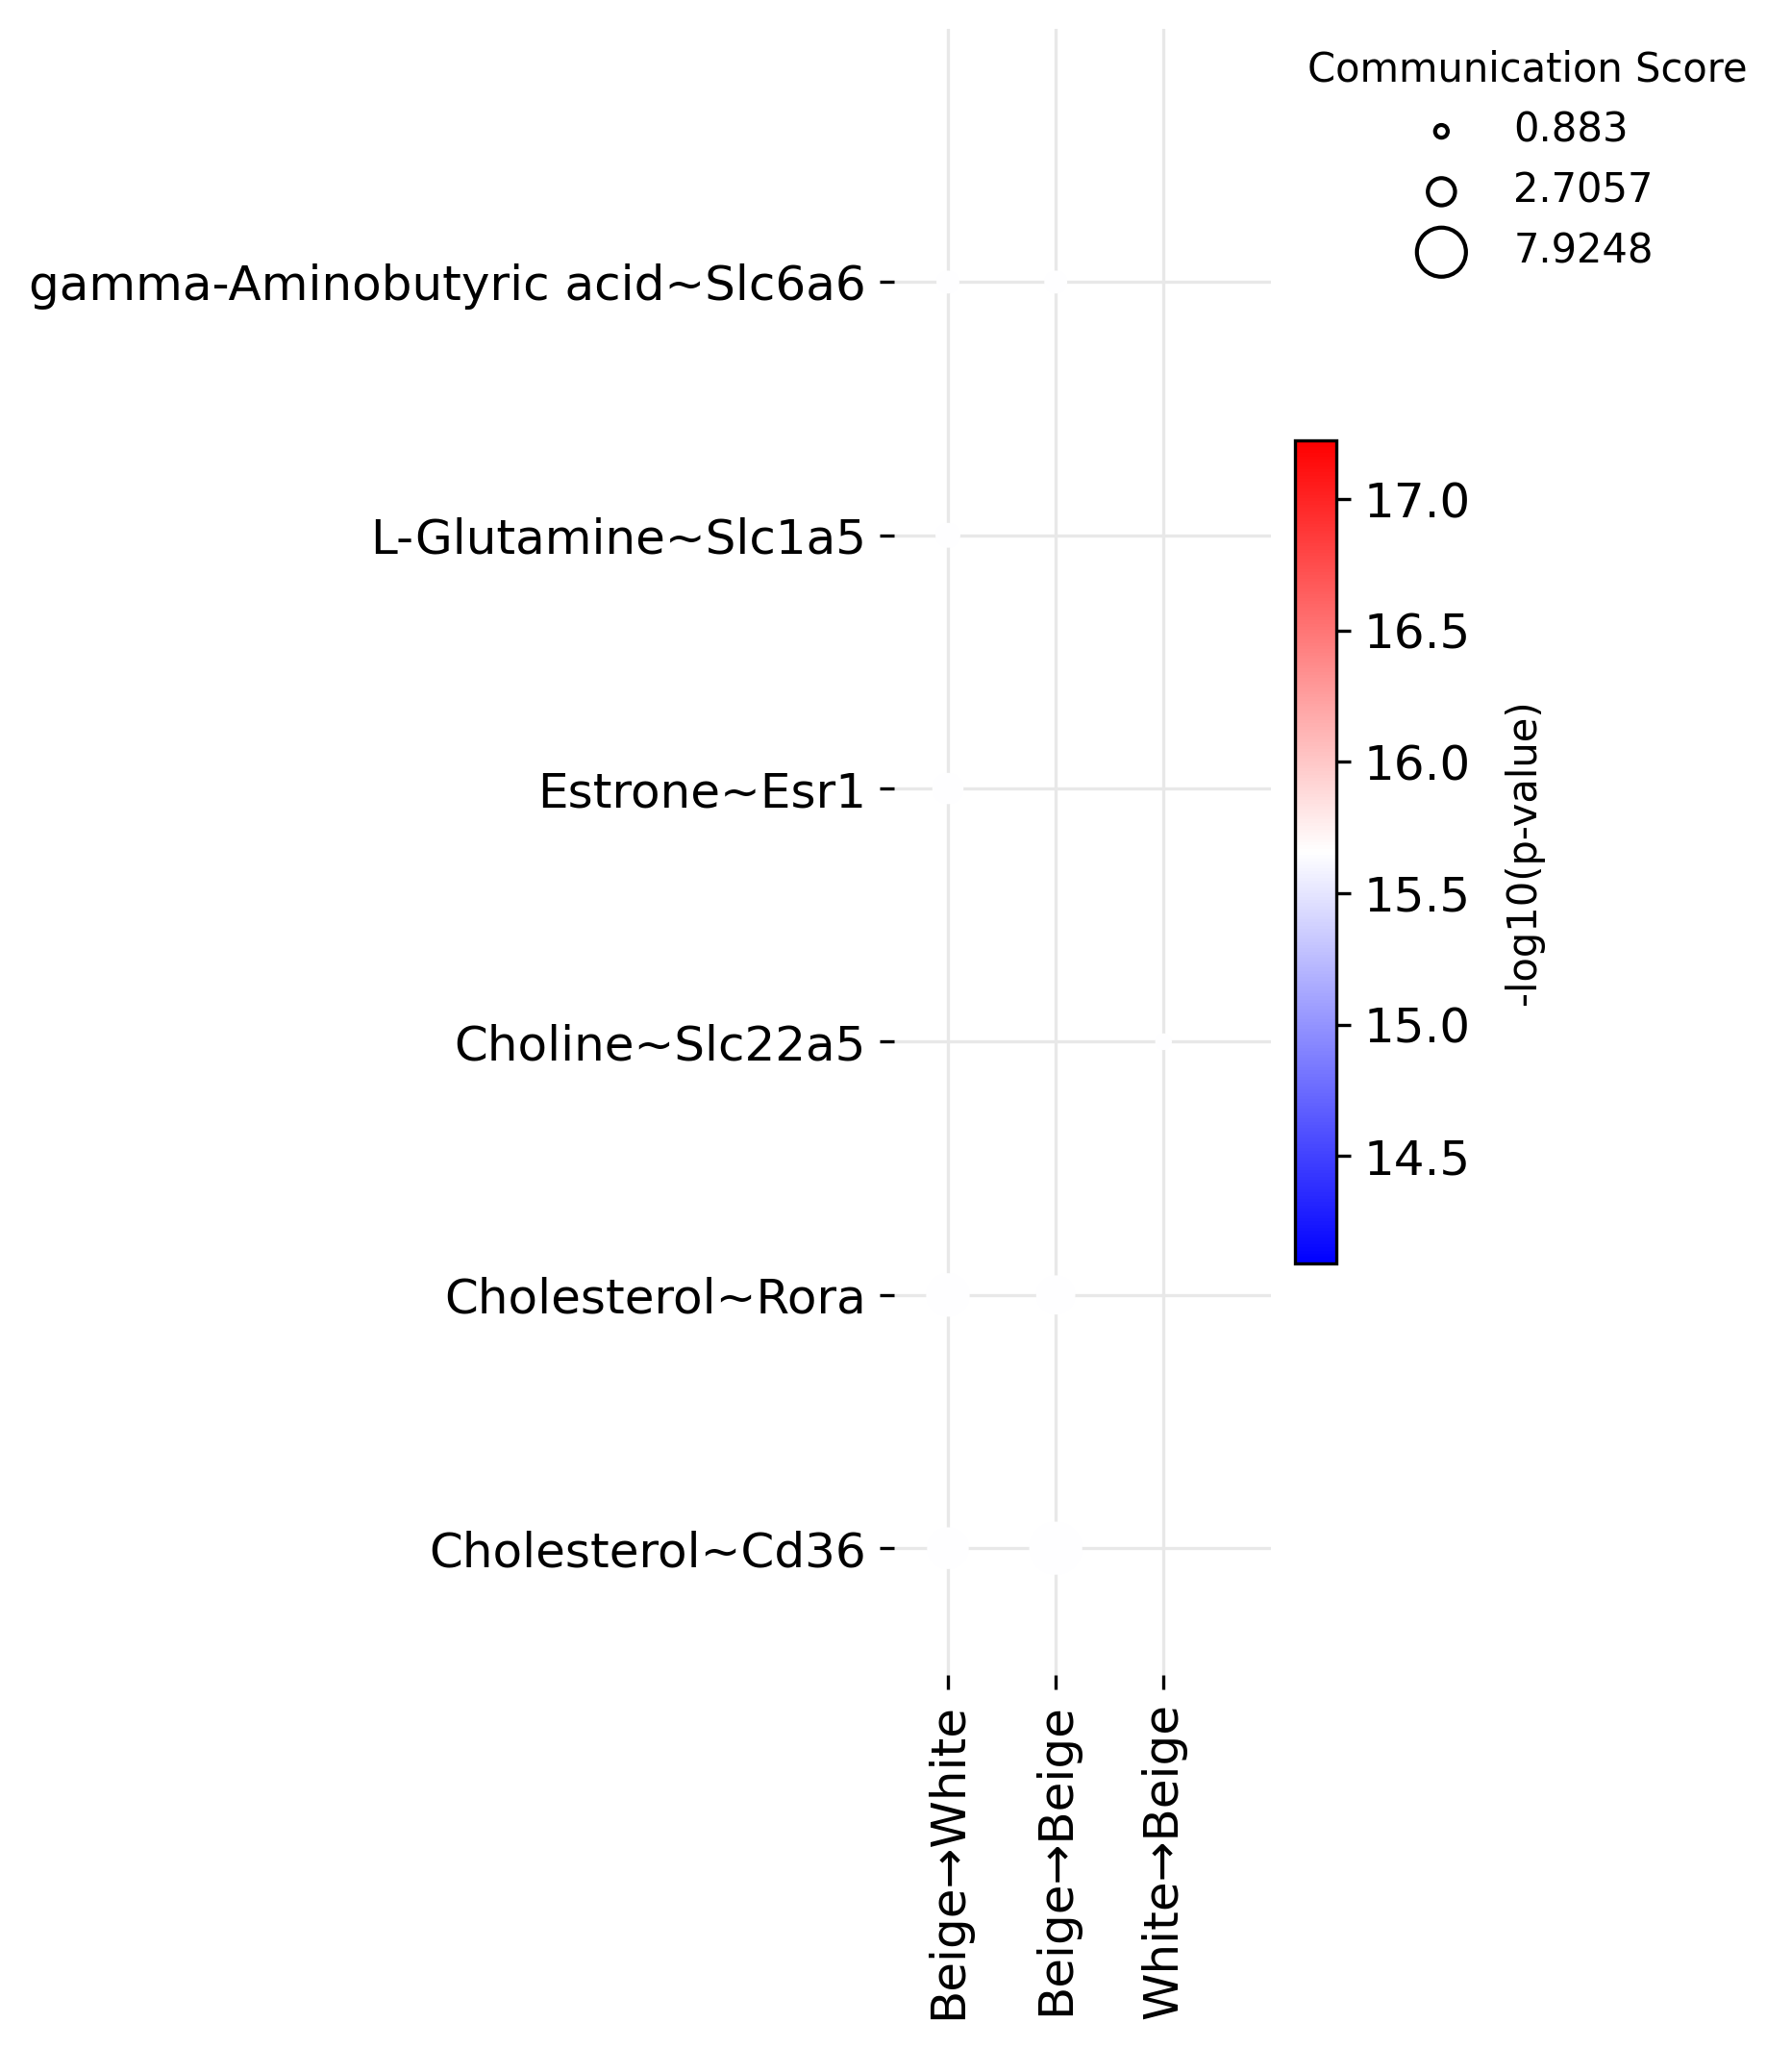

In [10]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                cmap_vmin = None,
                cmap_vmax = None,
                cellpair_order=[],
                met_sensor_order=[],
                dot_size_norm=(10, 150),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_range = None,
                comm_score_cutoff=0,
                swap_axis = False,
                return_fig = False
                )


#### Visualization of the communication flow from sender metabolite to sensor in receiver

[May 14, 2025 22:55:52]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


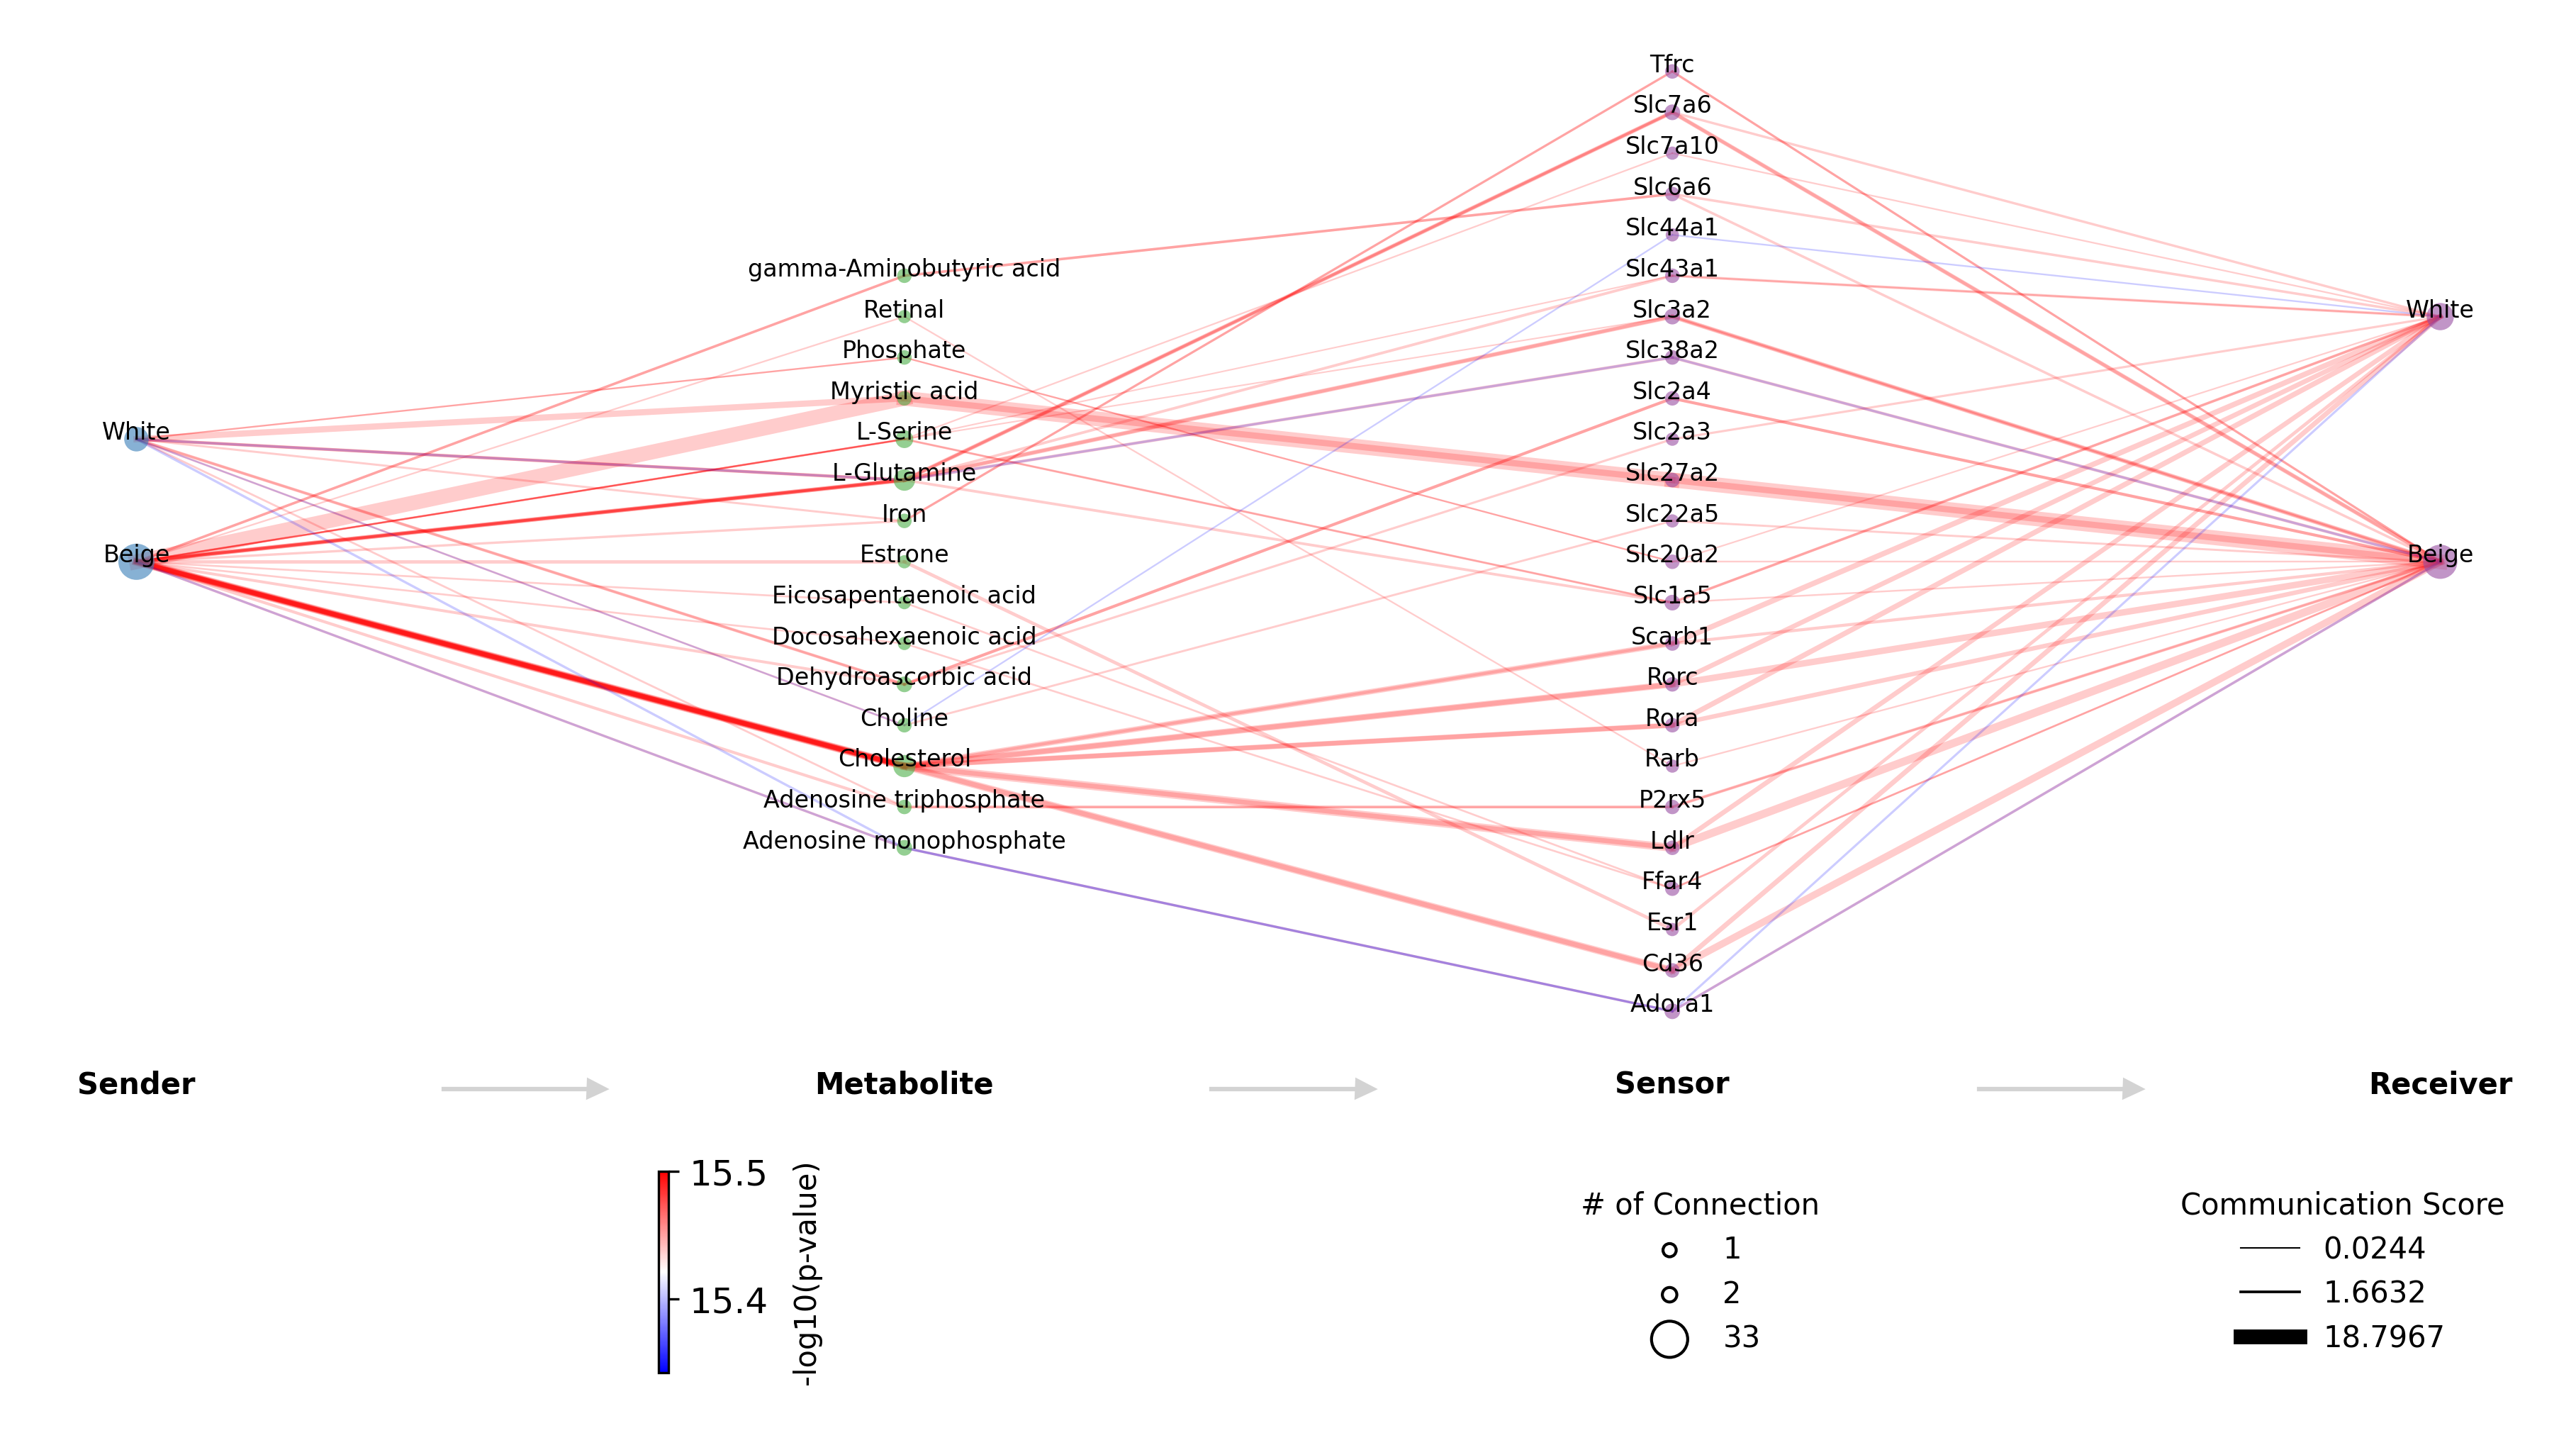

In [6]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.FlowPlot(
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                remove_unrelevant = False,
                and_or='and',
                node_label_size=8,
                node_alpha=0.6,
                figsize='auto',
                node_cmap='Set1',
                line_cmap='bwr',
                line_cmap_vmin = None,
                line_cmap_vmax = 15.5,
                node_size_norm=(20, 150),
                node_value_range = None,
                linewidth_norm=(0.5, 5),
                linewidth_value_range = None,
                save='test.pdf',
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                text_outline=False,
                return_fig = False
            )


#### Visualization of the aggregated enzyme expression for metabolite or sensor expression in cell groups


[May 17, 2024 12:27:24]: Warnings: no sensors to plot
[May 17, 2024 12:27:24]: Find metabolites ['Calcidiol', 'Cytidine', 'Choline', 'D-Fructose', 'Adenosine triphosphate'] to plot violin


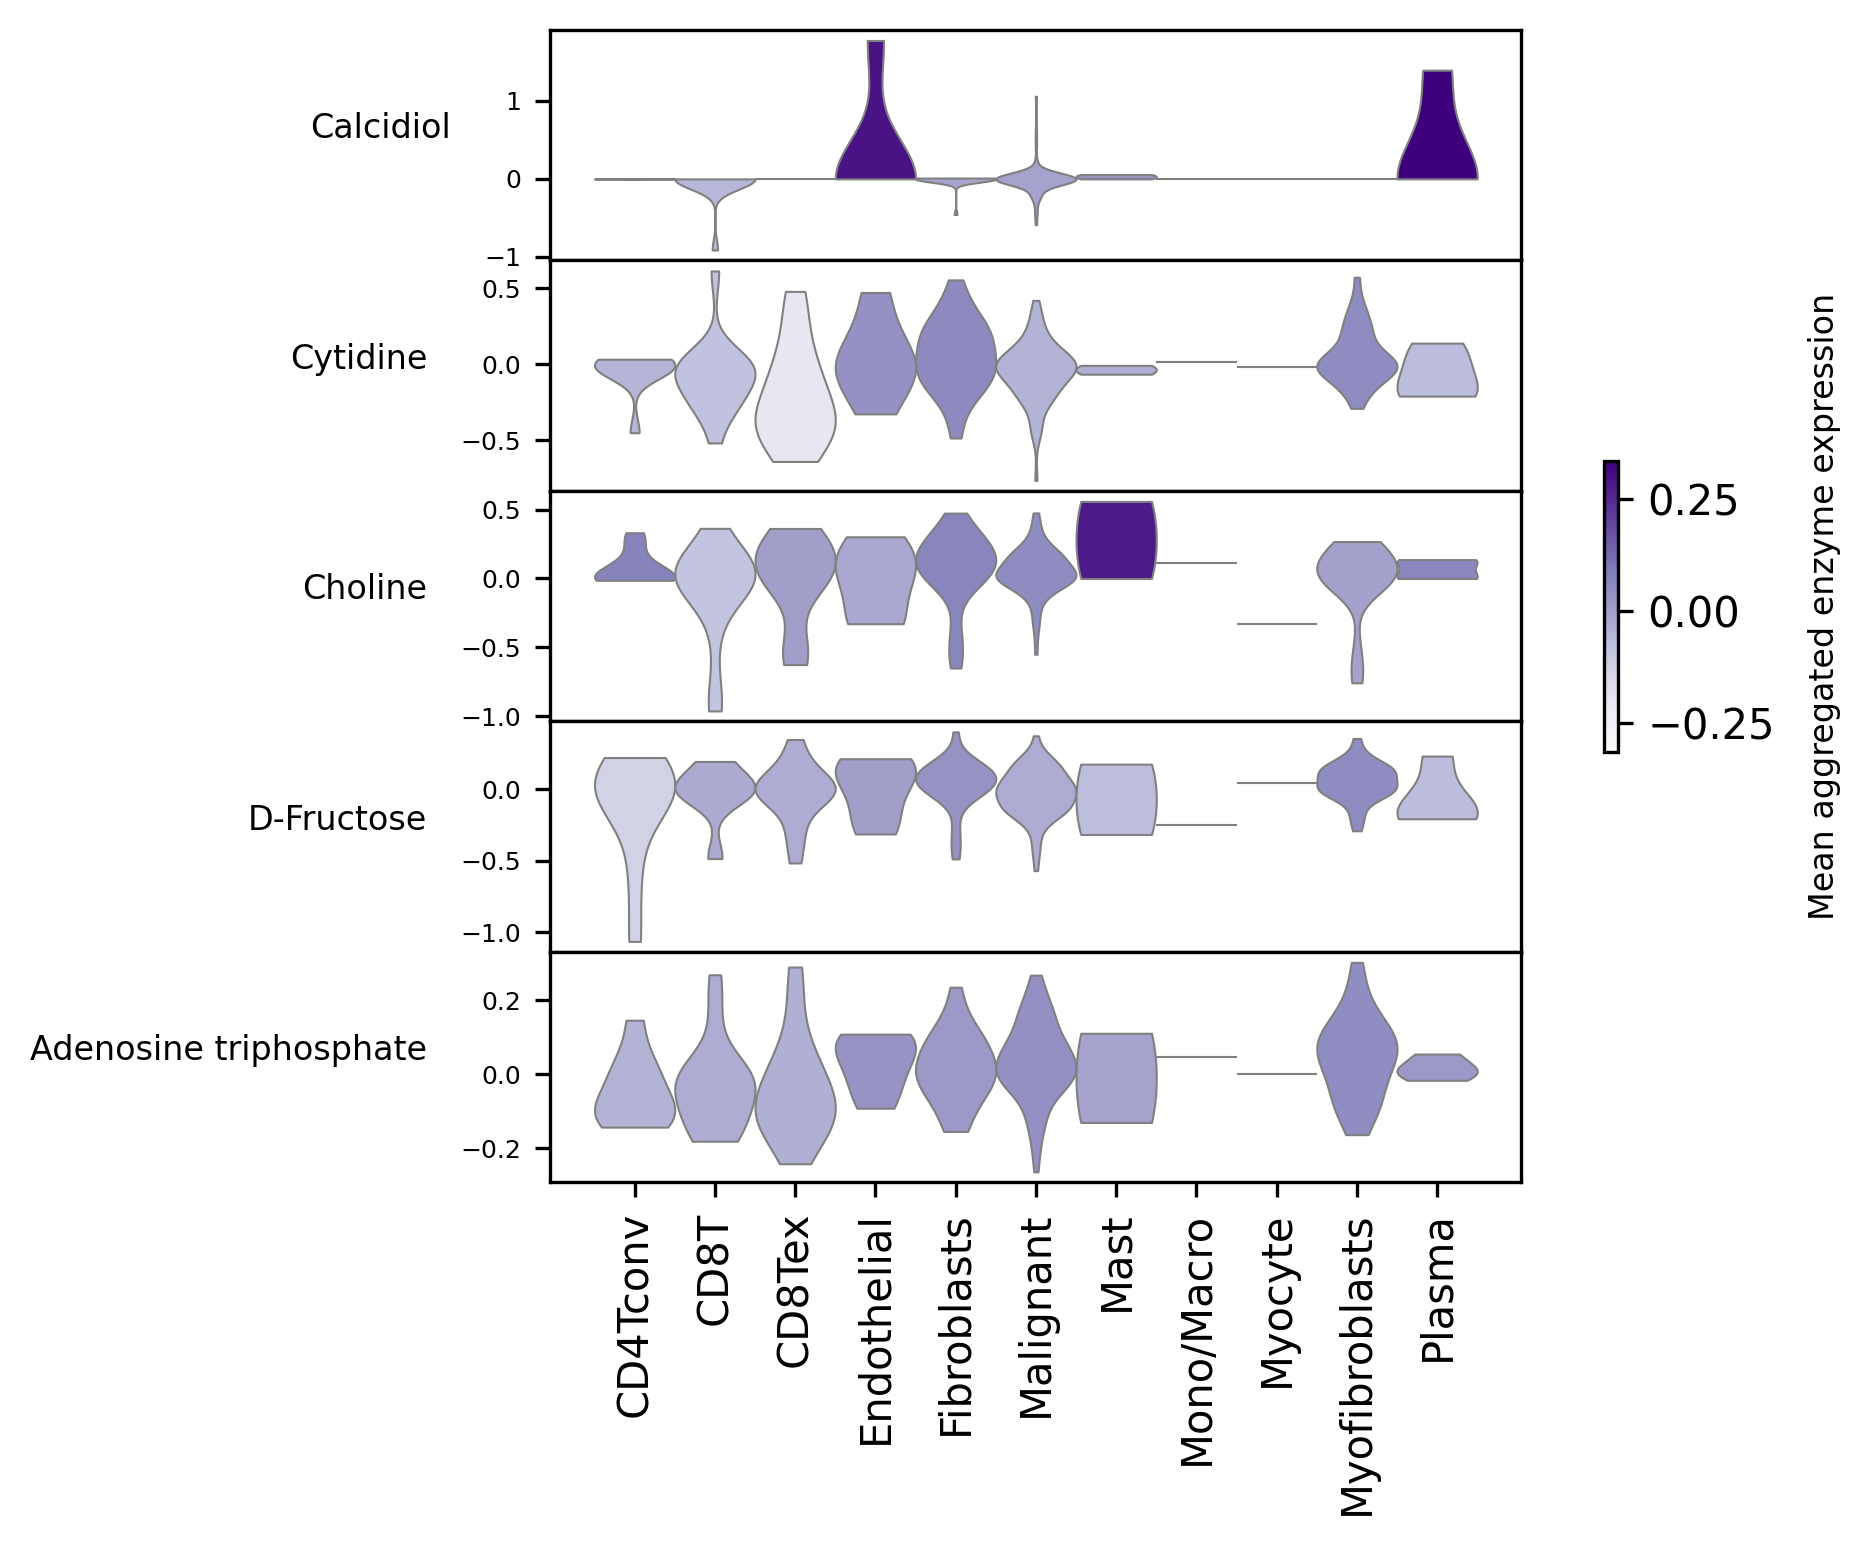

In [21]:
## violin plot to show the aggregated metabolite enzymes of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_met[:5], ## only top 5 as example
                    cell_focus=[],
                    cell_order = [],
                    row_zscore = False,
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


[May 15, 2024 14:41:59]: Find genes Index(['S1PR1', 'P2RY14', 'SLC1A5', 'ADRB2', 'PTGER4'], dtype='object') to plot violin


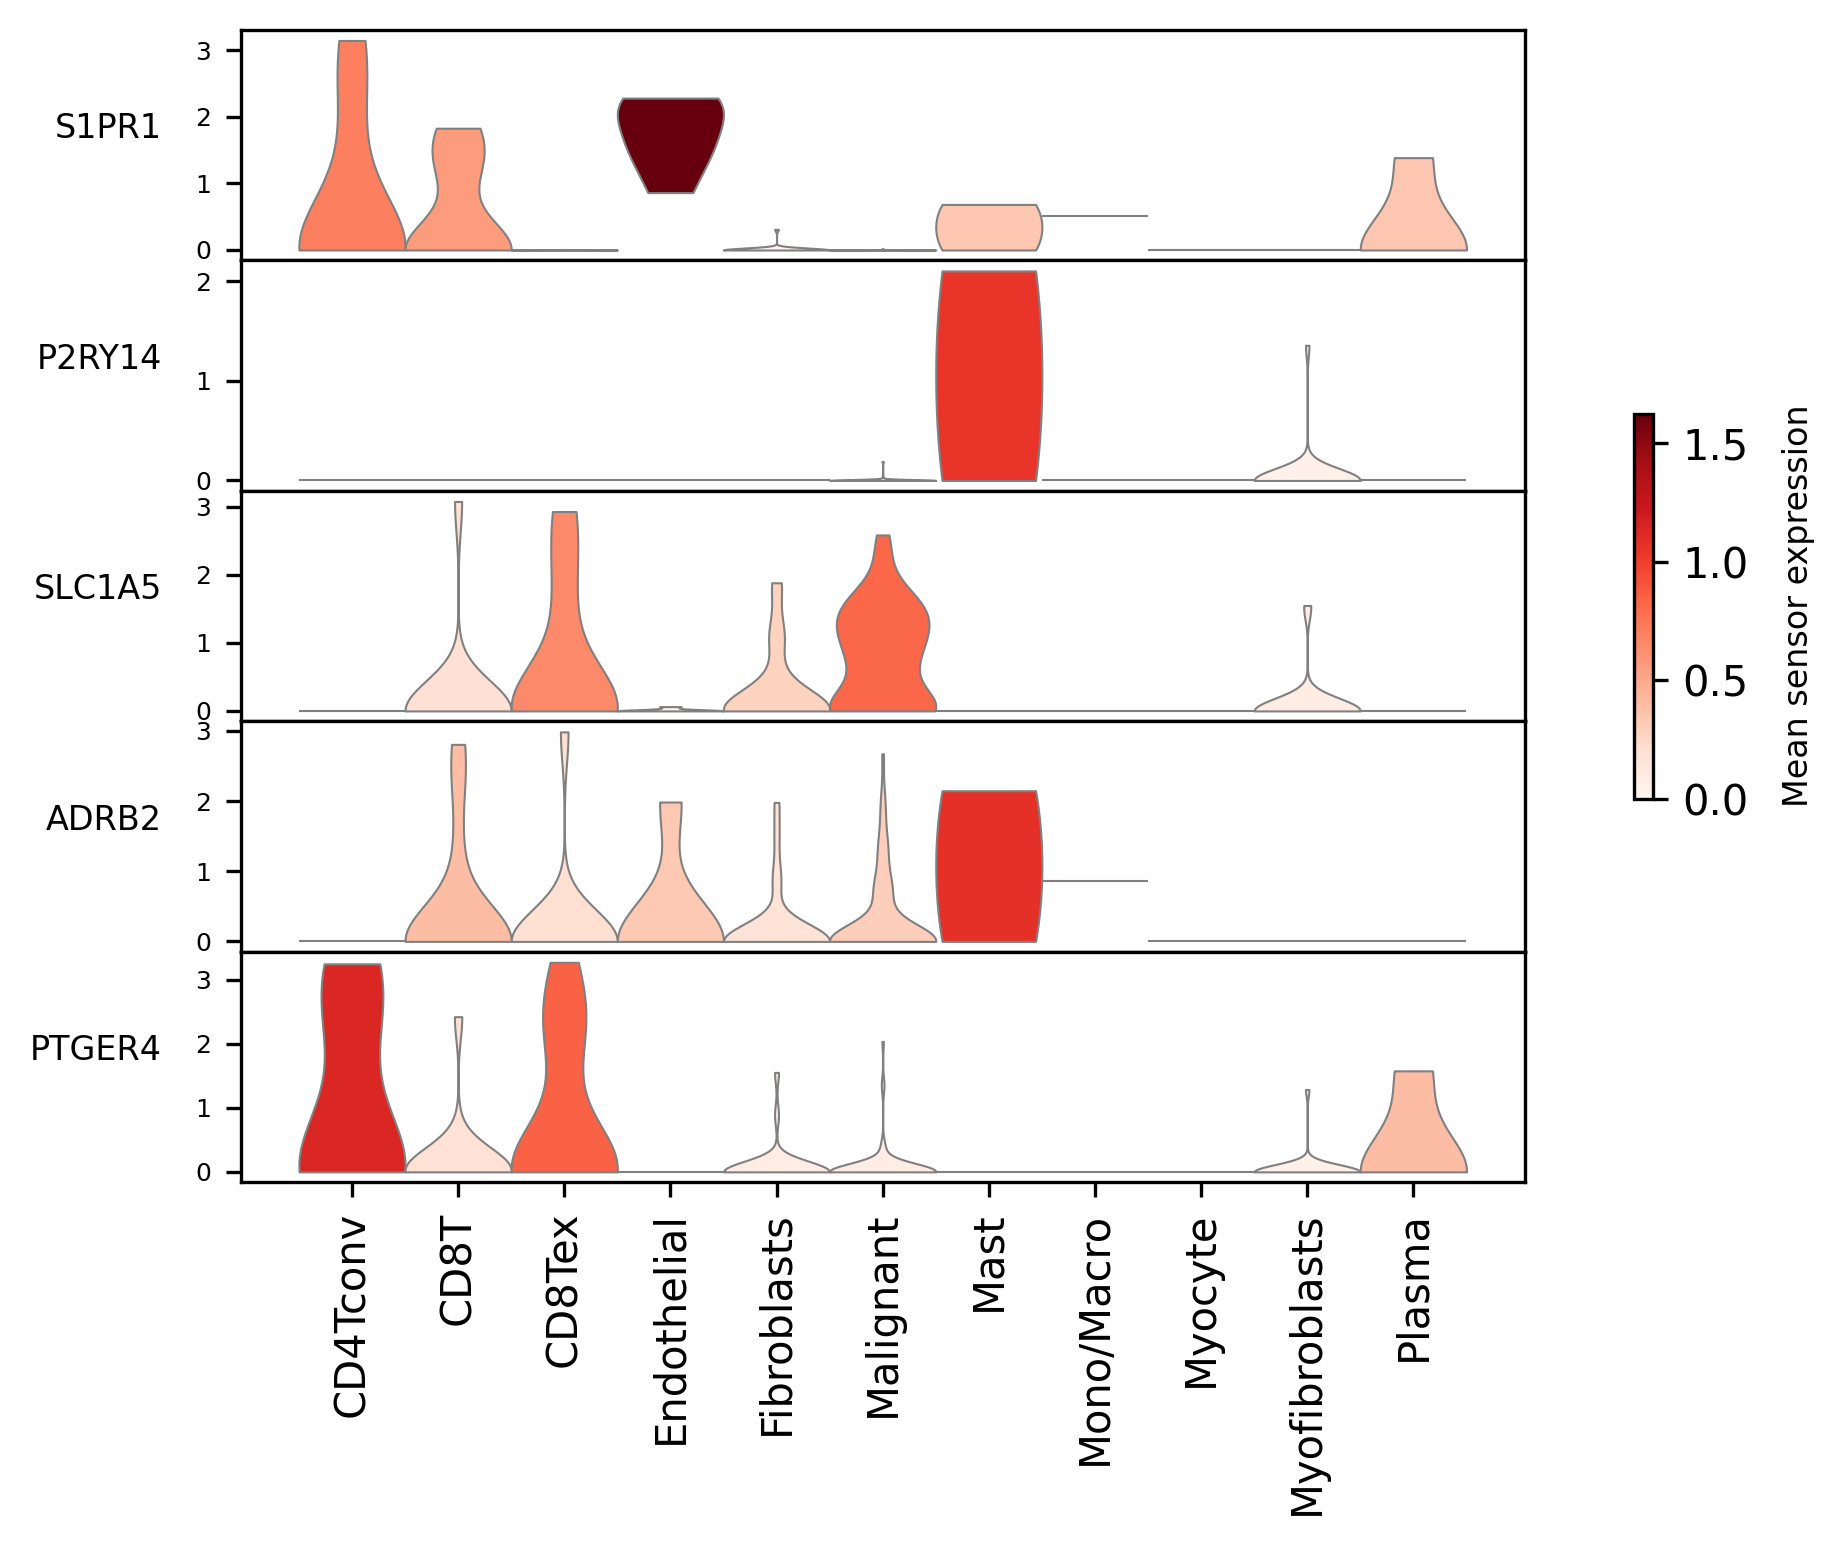

[May 15, 2024 14:42:00]: Warnings: no metabolites to plot


In [27]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_sensor[:5],## only top 5 as example
                    cell_focus=[],
                    cell_order = [],
                    row_zscore = False,
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )


### 2.9 extract data and save figures


#### extract communication and write to a table:


In [18]:
### the updated and tidy communication result is in object, can be retreved by:
commu_res = mebo_obj.commu_res.copy()
## filter by FDR less than 0.05
commu_res = commu_res[commu_res['permutation_test_fdr']<=0.05]
## write to tsv file
commu_res.to_csv('communication_result.tsv', sep = '\t', index = None)


#### save figures
<p>Users can save figures by either providing by parameter 'save' for each plotting function, or save figure separately by hand, in this case, users need to set 'return_fig = True'</p>

###### Method 1: a example for providing filename by parameter


In [28]:
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    ## Note that filename passed by save parameter:
                    save='mebocost_eventnum.pdf',
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )




###### Method 2: a example for saving figures separately


In [30]:
fig = mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=True
                )
## save figure
fig.savefig('mebocost_eventnum.pdf')


#### 3 Change parameters to re-loaded object
<p>change or revise config file</p>
<p>If you changed the workspace compared to the one where you generated this object, or you want to change configure files (mebocost.conf), you may want to reset the path of the configure file, you can check the path of configure file in the current re-loaded object by:</p>

In [31]:
### If you changed the workspace compared to the one where you generated this object, 
### or you want to change configure files (mebocost.conf),
### you may want to reset the path of the configure file, 
### you can check the path of configure file in the current re-loaded object by:
print('config file path in the object:', mebo_obj.config_path)

#### if you do need to change, revise the mebocost.conf file first. 
### If done, pass the path to mebocost:

mebo_obj.config_path = './mebocost.conf'

#### then, re-load config files

mebo_obj._load_config_()


config file path in the object: ./mebocost.conf
[May 15, 2024 14:42:36]: Load config and read data based on given species [human].


#### If you want to change parameters such as cutoff of sensor expression or metabolite aggregated enzyme expression


In [5]:
# ## if users want to adjust some parameters regarding cutoff of expression 
# ## and proportion of cells expressed to focus on highly confident ones,

# ## we save the original result in variable of original_result, 
# ## so additional filtering can be done on this data frame

# ## the cutoff of sensor expression and metabolite abundance 
# ## should really dependent onusers dataset

# ## exp_prop and met_prop have been saved in the mebocost object, 
# ## you can retreve by mebo_obj.exp_prop and mebo_obj.met_prop
# ## you also can re-calculate by changing the cutoff:

exp_prop, met_prop = mebo_obj._check_aboundance_(cutoff_exp = 0.1,
                                                   cutoff_met = 0.1)


## you can pass the exp_prop and met_prop to the function and 
## filter out bad communications under the cutoff
## here is the example to use newly calculated exp_prop and met_prop
## if you want to use previously calculated in mebocost object, 
## you can replace met_prop by mebo_obj.met_prop, same for exp_prop
## cutoff_prop here means the faction of cells in the cell group expressing the senser
## or having the abundant of metabolite
commu_res_new = mebo_obj._filter_lowly_aboundant_(pvalue_res = mebo_obj.original_result.copy(),
                                                    cutoff_prop = 0.2,
                                                    met_prop=met_prop,
                                                    exp_prop=exp_prop,
                                                    min_cell_number = 1
                                                 )

## update your commu_res in mebocost object, 
## so that the object can used to generate figure based on the updated data
mebo_obj.commu_res = commu_res_new.query('permutation_test_fdr < 0.05').copy()



[May 14, 2025 22:55:45]: Calculating metabolite aggregated enzyme and sensor expression in cell groups
[May 14, 2025 22:55:45]: cutoff for sensor expression, cutoff=0.1
[May 14, 2025 22:55:45]: cutoff for metabolite aggregated enzyme, cutoff=0.1
[May 14, 2025 22:55:45]: cutoff_exp: 0.1
[May 14, 2025 22:55:45]: cutoff_metabolite: 0.1
[May 14, 2025 22:55:45]: Set p value and fdr to 1 if sensor or metaboltie expressed cell proportion less than 0.2
